In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
#Reading from CSV File and Storing in Dataframe
X_train = pd.read_csv('../../Dataset/x_train_all.csv')
y_train = pd.read_csv('../../Dataset/y_train_all.csv')
X_test = pd.read_csv('../../Dataset/x_test_all.csv')
y_test = pd.read_csv('../../Dataset/y_test_all.csv')

In [3]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train.shape)
print("= Shape of y_train is  :", y_train.shape)
print("= Shape of X_test is   :", X_test.shape)
print("= Shape of y_test is   :", y_test.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (9690, 2304)
= Shape of y_train is  : (9690, 1)
= Shape of X_test is   : (3090, 2304)
= Shape of y_test is   : (3090, 1)


In [4]:
X_train_new, X_test_60 = train_test_split(X_train, test_size=0.6, random_state=42)

In [5]:
X_test_new = pd.concat([X_test, X_test_60], ignore_index=True)

In [6]:
y_train_new, y_test_60 = train_test_split(y_train, test_size=0.6, random_state=42)
y_test_new = pd.concat([y_test, y_test_60], ignore_index=True)

In [7]:
#Printing the shapes of the training
print("========================================")
print("=   Shape to train and test Dataset    =")
print("========================================")
print("= Shape of X_train is  :", X_train_new.shape)
print("= Shape of y_train is  :", y_train_new.shape)
print("= Shape of X_test is   :", X_test_new.shape)
print("= Shape of y_test is   :", y_test_new.shape)
print("========================================")

=   Shape to train and test Dataset    =
= Shape of X_train is  : (3876, 2304)
= Shape of y_train is  : (3876, 1)
= Shape of X_test is   : (8904, 2304)
= Shape of y_test is   : (8904, 1)


In [8]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy') 

In [9]:
# Train the classifier on the training set
clf.fit(X_train_new, y_train_new)

DecisionTreeClassifier(criterion='entropy')

In [10]:
# Predict on the training set
train_predictions = clf.predict(X_train_new)
train_accuracy = accuracy_score(y_train_new, train_predictions)
print(f"Accuracy on Training Set: {train_accuracy}")

Accuracy on Training Set: 1.0


In [11]:
# Predict on the testing set
test_predictions = clf.predict(X_test_new)
test_accuracy = accuracy_score(y_test_new, test_predictions)
print(f"Accuracy on Test Set: {test_accuracy}")

Accuracy on Test Set: 0.764487870619946


In [12]:
print(classification_report(y_test_new, test_predictions))

              precision    recall  f1-score   support

           0       0.62      0.57      0.59       194
           1       0.77      0.78      0.77      2056
           2       0.79      0.80      0.79      2108
           3       0.80      0.78      0.79      1316
           4       0.79      0.81      0.80      1811
           5       0.61      0.53      0.57       189
           6       0.66      0.62      0.64       309
           7       0.64      0.62      0.63       204
           8       0.71      0.77      0.74       468
           9       0.62      0.56      0.59       249

    accuracy                           0.76      8904
   macro avg       0.70      0.68      0.69      8904
weighted avg       0.76      0.76      0.76      8904



In [13]:
# Calculating precision, recall, and F1-score for each class
precision = precision_score(y_test_new, test_predictions, average=None)
recall = recall_score(y_test_new, test_predictions, average=None)
f1 = f1_score(y_test_new, test_predictions, average=None)

In [14]:
#Creating dataframe of precision, recall, and F1-score for each class
df = pd.DataFrame({'Precision': precision, 'F1 Score': f1, 'Recall': recall})
df

,Precision,F1 Score,Recall
0,0.625000,0.594595,0.567010
1,0.771981,0.774600,0.777237
2,0.789770,0.794055,0.798387
3,0.803292,0.790895,0.778875
4,0.789276,0.800871,0.812811
5,0.612121,0.570621,0.534392
6,0.656357,0.636667,0.618123
7,0.635000,0.628713,0.622549
8,0.711462,0.739220,0.769231
9,0.625000,0.591966,0.562249


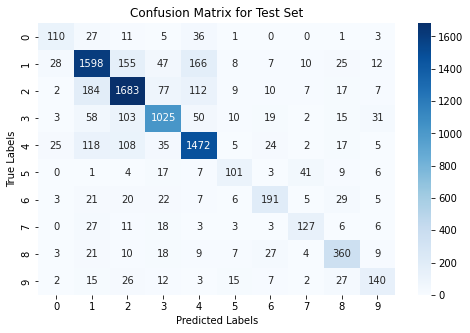

In [15]:
# Generate and visualize the confusion matrix for the test set
cm = confusion_matrix(y_test_new, test_predictions)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_train_new), yticklabels=np.unique(y_train_new))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Set')
plt.show()